In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Why Seaborn
- provides a layer of abstraction hence simpler to use
- better aesthetcis
- more graphs included
- less number of lines as compared to matplotlib
## Seaborn roadmap
#### Types of functions
- Figure level
- Axis level
#### Main classification
- Relational plot(scatter,line plot)
- Distribution plot(histogram,kde,rug plot)
- Categorical plot(bar,count,box,violin,swarm plot)
- Regression plot
- Matrix plot(heatmap,clustermap plot)
- Multiplots(join,pair plot)

### Relational plot

In [6]:
tips=sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


<Axes: xlabel='total_bill', ylabel='tip'>

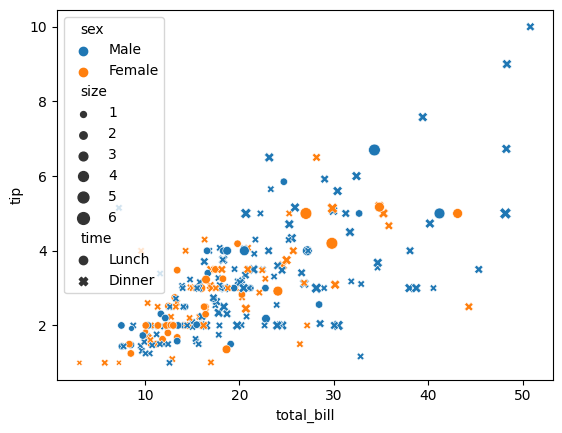

In [17]:
# scatterplot -> axes level function
sns.scatterplot(data=tips
                ,x='total_bill'
                ,y='tip'
                ,hue='sex'
                ,style='time'
                ,size='size')

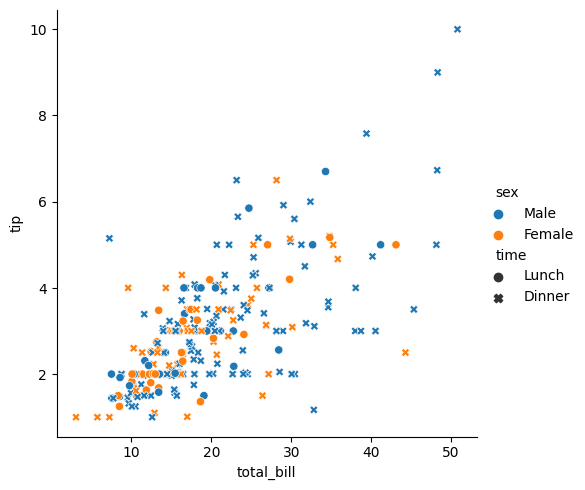

In [14]:
# relplot -> figure level function
sns.relplot(data=tips,x='total_bill',y='tip',kind='scatter',hue='sex',style='time')

In [25]:
# lineplot(when x axis is time(hour,day,year) or it is continous)
gap=px.data.gapminder()
pgap=gap[gap['country']=='Pakistan']
pgap.sample(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1169,Pakistan,Asia,1977,54.043,78152686,1175.921193,PAK,586
1165,Pakistan,Asia,1957,45.557,46679944,747.083529,PAK,586
1174,Pakistan,Asia,2002,63.610,153403524,2092.712441,PAK,586


<Axes: xlabel='year', ylabel='gdpPercap'>

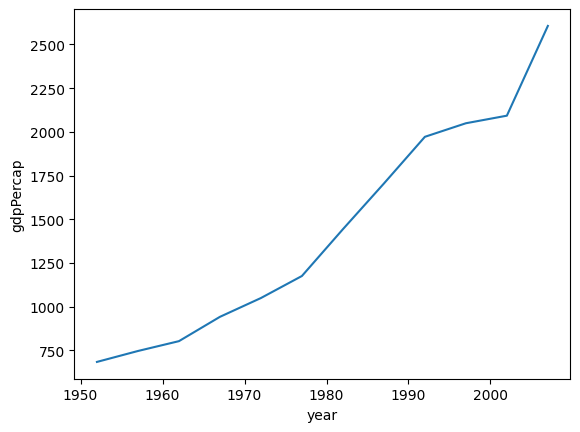

In [30]:
sns.lineplot(data=pgap,x='year',y='gdpPercap')

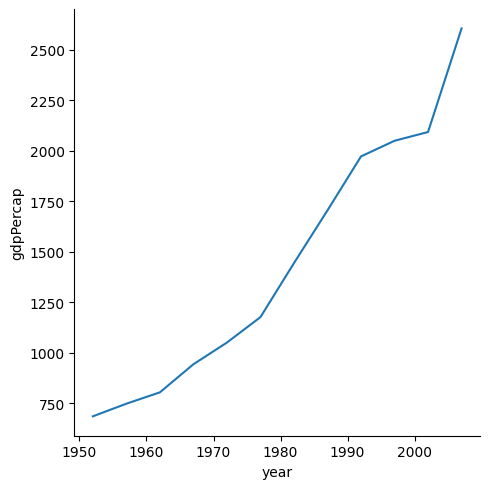

In [29]:
sns.relplot(data=pgap,x='year',y='gdpPercap',kind='line')

In [41]:
gap3=gap[gap['country'].isin(['Germany','Pakistan','Brazil'])]
gap3.sample(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
566,Germany,Europe,1962,70.300,73739117,12902.462910,DEU,276
1168,Pakistan,Asia,1972,51.929,69325921,1049.938981,PAK,586
1172,Pakistan,Asia,1992,60.838,120065004,1971.829464,PAK,586


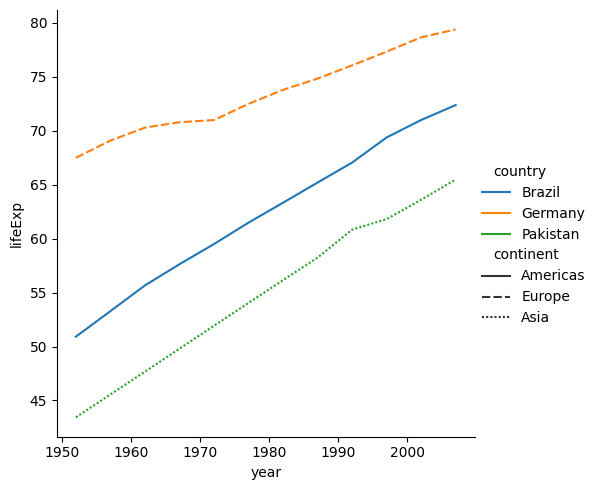

In [58]:
sns.relplot(data=gap3,
            x='year',
            y='lifeExp',
            kind='line',
            hue='country',
            style='continent'
           )

<Axes: xlabel='year', ylabel='lifeExp'>

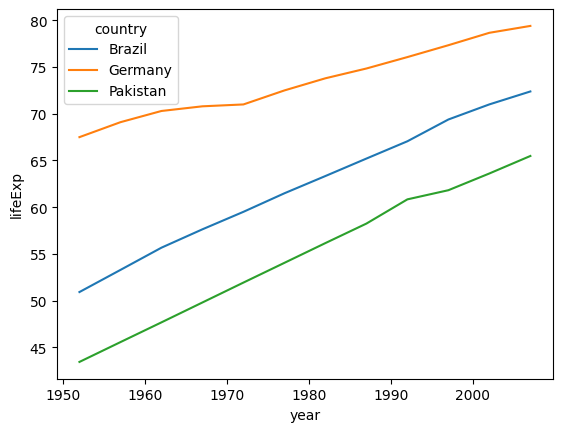

In [48]:
sns.lineplot(data=gap3,x='year',y='lifeExp',hue='country')

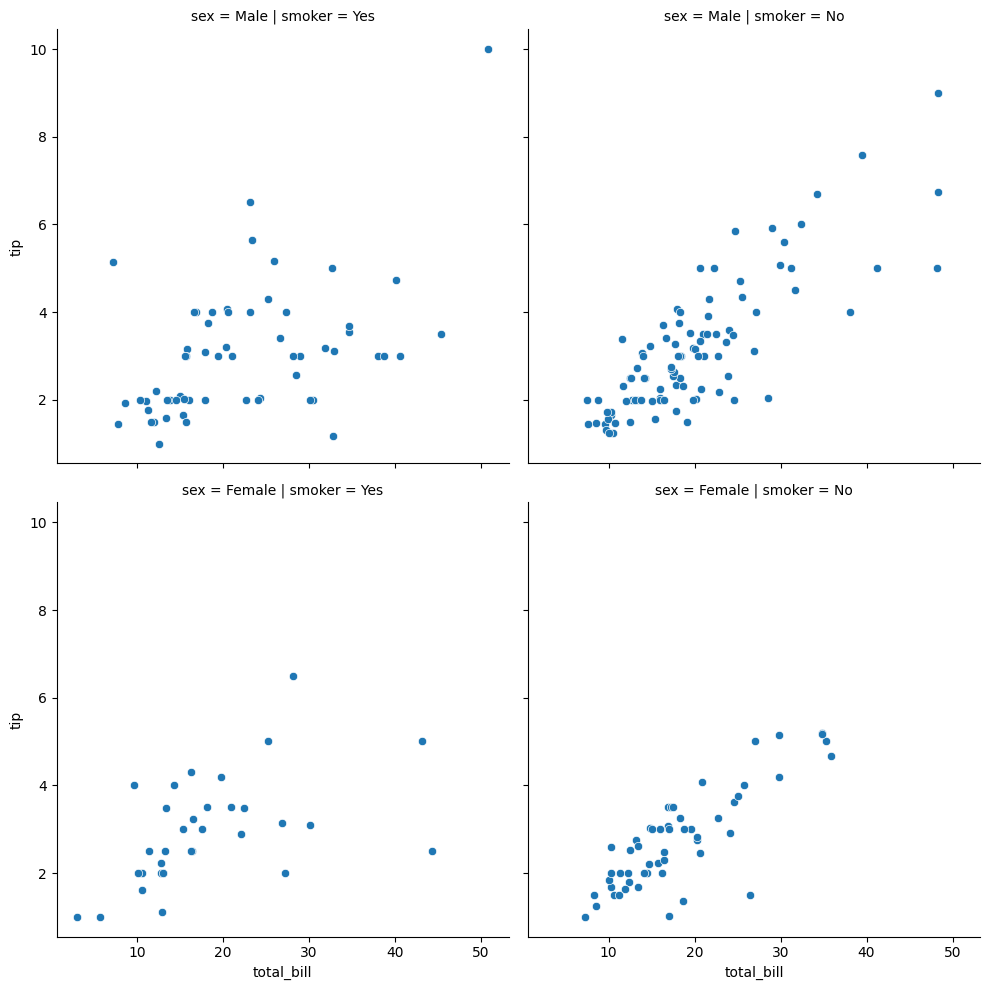

In [56]:
# facetplot -> will work only in figure level functions
sns.relplot(data=tips,
            x='total_bill',
            y='tip',
            kind='scatter',
            row='sex',
            col='smoker'
          )

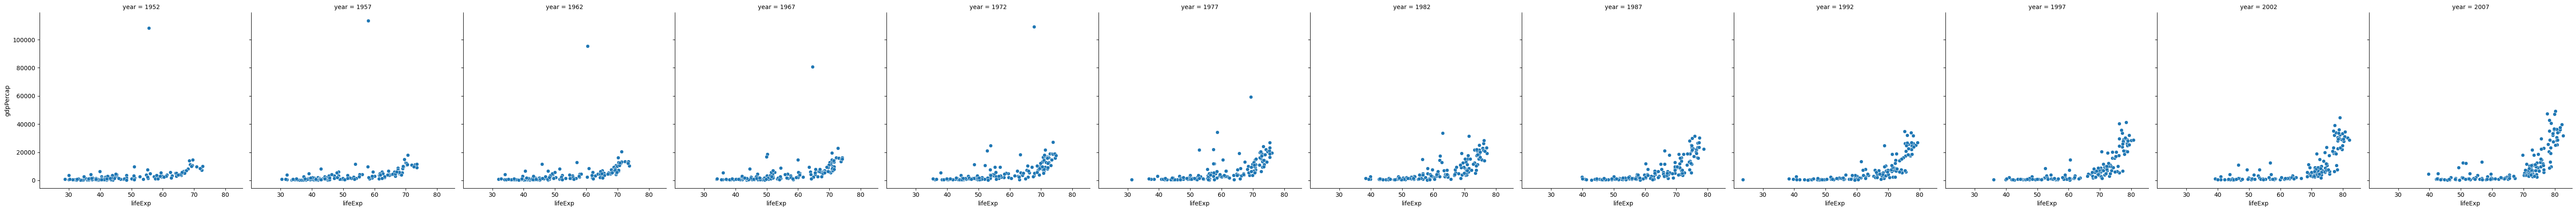

In [64]:
sns.relplot(data=gap,x='lifeExp',y='gdpPercap',kind='scatter',col='year')

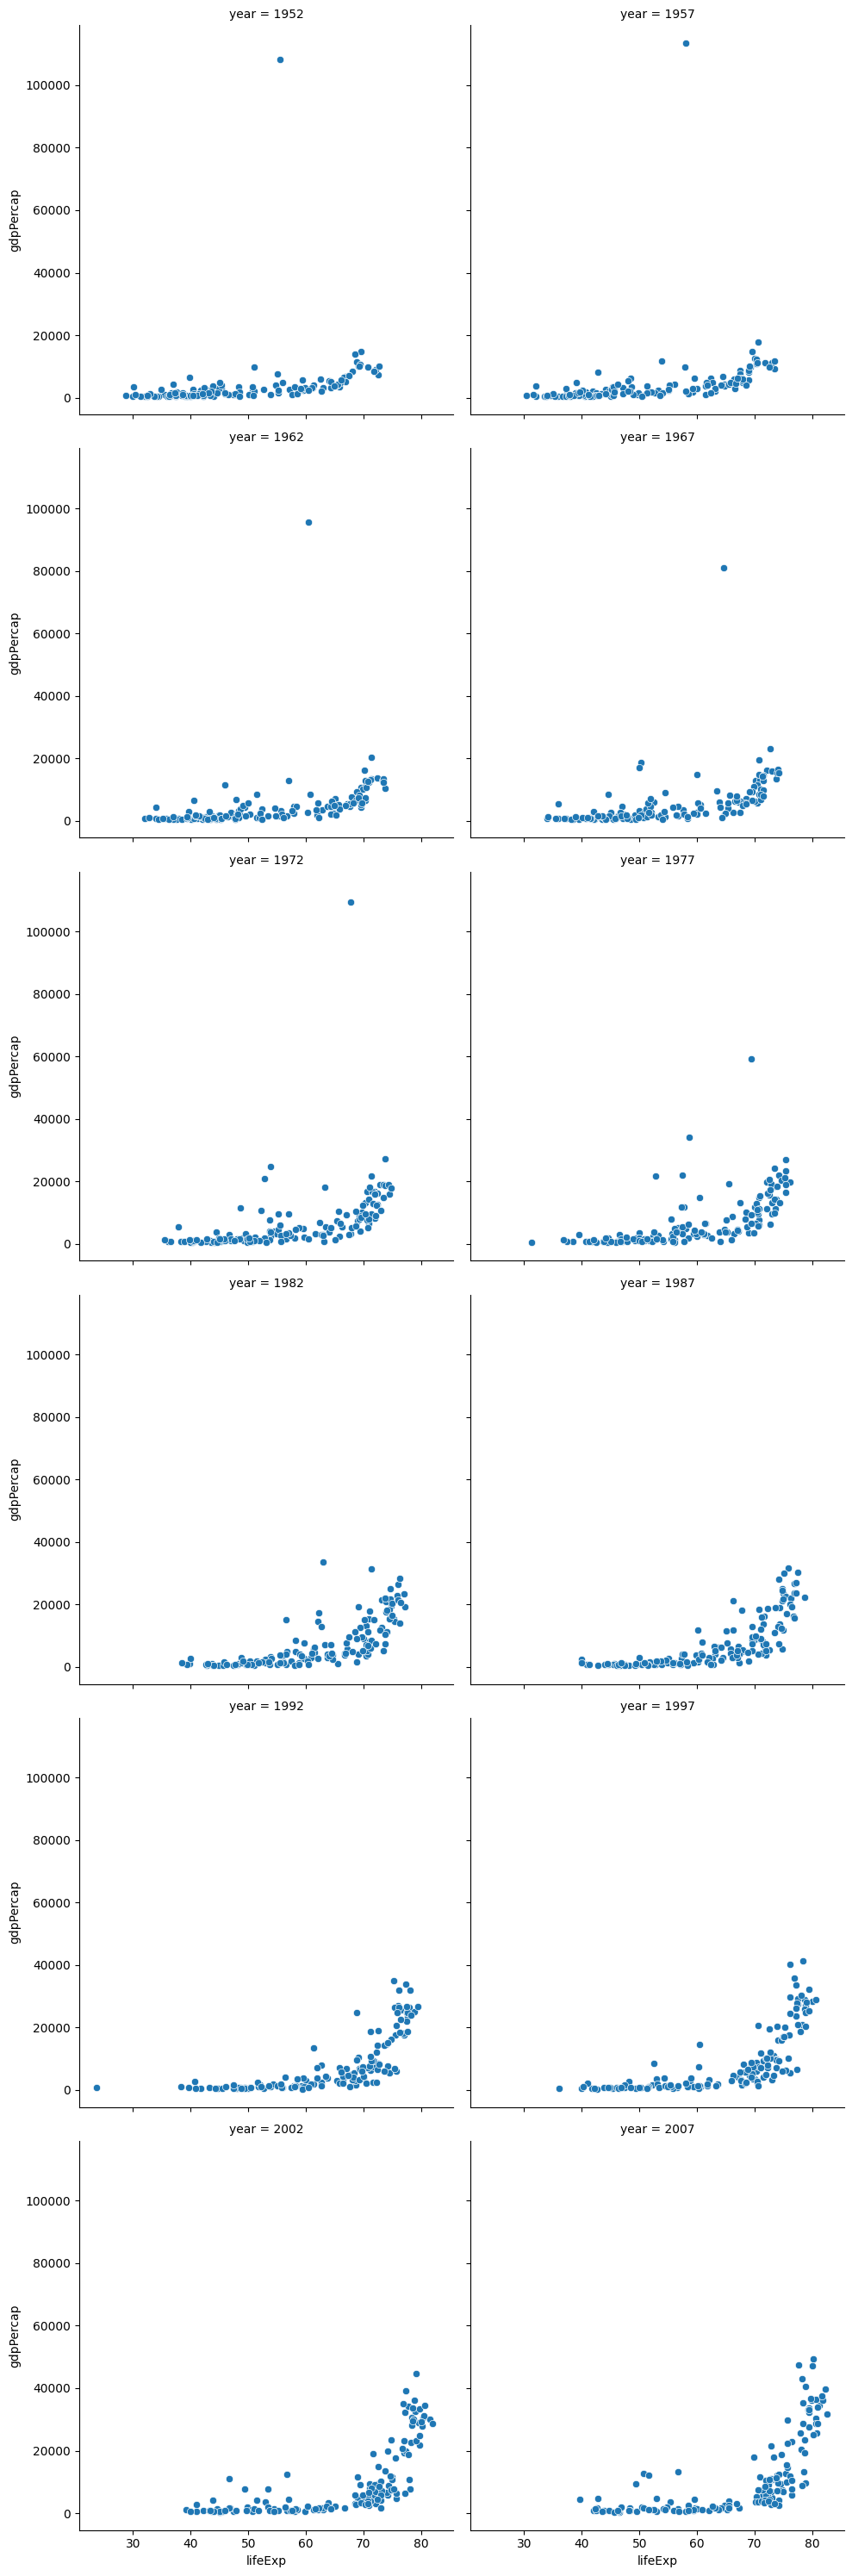

In [65]:
sns.relplot(data=gap,x='lifeExp',y='gdpPercap',kind='scatter',col='year',col_wrap=2)

### Distribution plot
- used for univariate analysis
- used to find out distribution
- central tendency
- is it unimodal or bimodal?
- are there outliers?

In [66]:
# figure level -> displot
# axes level -> histplot,kdeplot,rugplot

<Axes: xlabel='total_bill', ylabel='Count'>

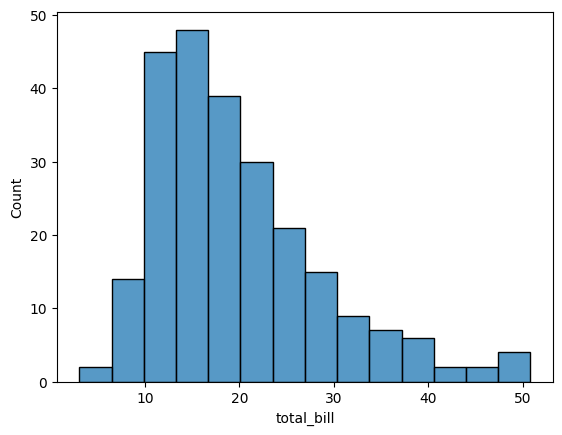

In [70]:
sns.histplot(data=tips,x='total_bill')

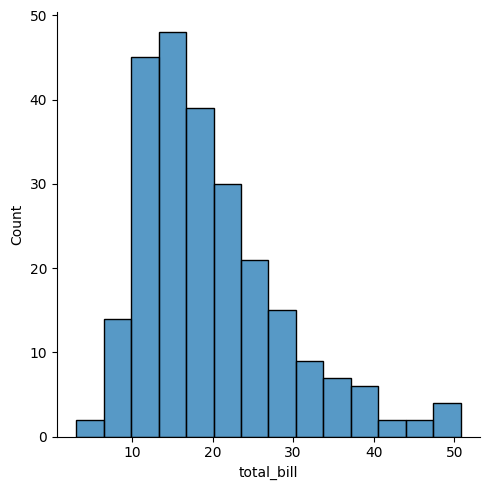

In [71]:
sns.displot(data=tips,x='total_bill',kind='hist')

<Axes: xlabel='total_bill', ylabel='Count'>

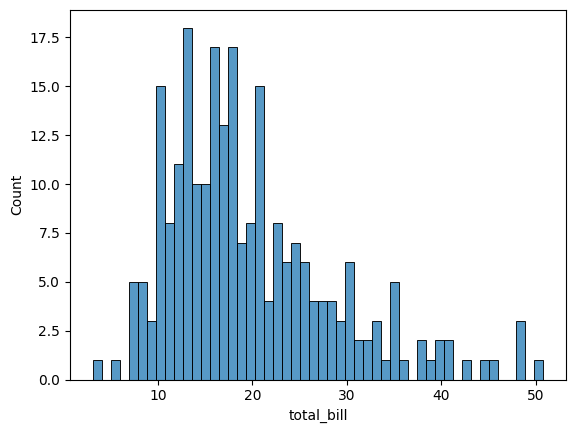

In [74]:
sns.histplot(data=tips,x='total_bill',
             bins=50
            )

<Axes: xlabel='day', ylabel='Count'>

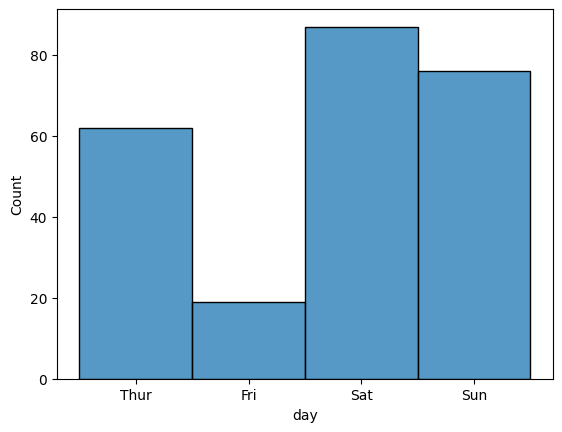

In [80]:
# histogram on categorical columns
sns.histplot(data=tips,x='day')

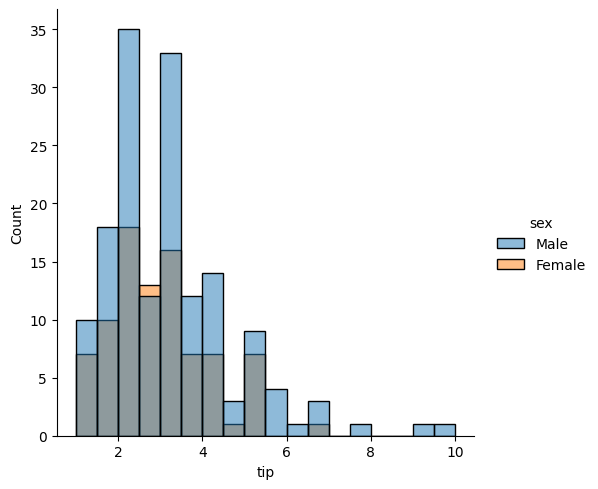

In [81]:
sns.displot(data=tips,x='tip',kind='hist',hue='sex')

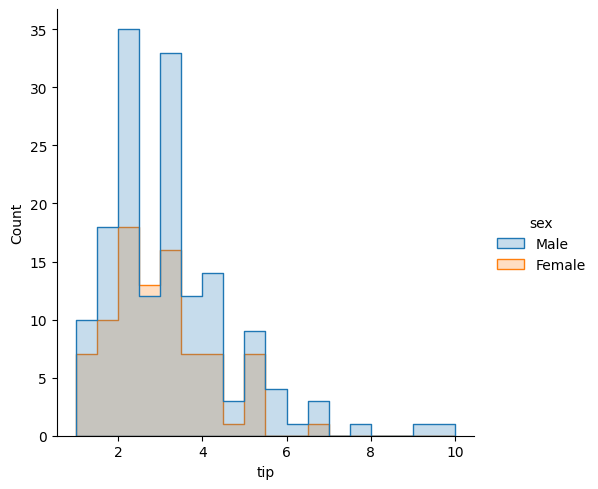

In [82]:
sns.displot(data=tips,x='tip',kind='hist',hue='sex',
           element='step')

In [84]:
titanic=sns.load_dataset('titanic')
titanic.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
836,0,3,male,21.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
486,1,1,female,35.0,1,0,90.0000,S,First,woman,False,C,Southampton,yes,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


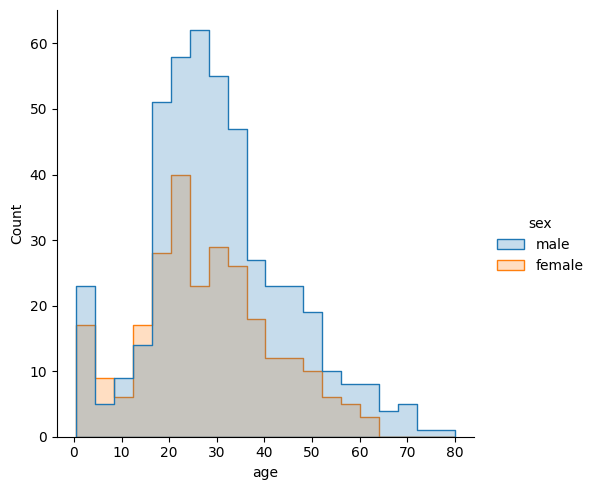

In [87]:
sns.displot(data=titanic,x='age',kind='hist',
           hue='sex',element='step')

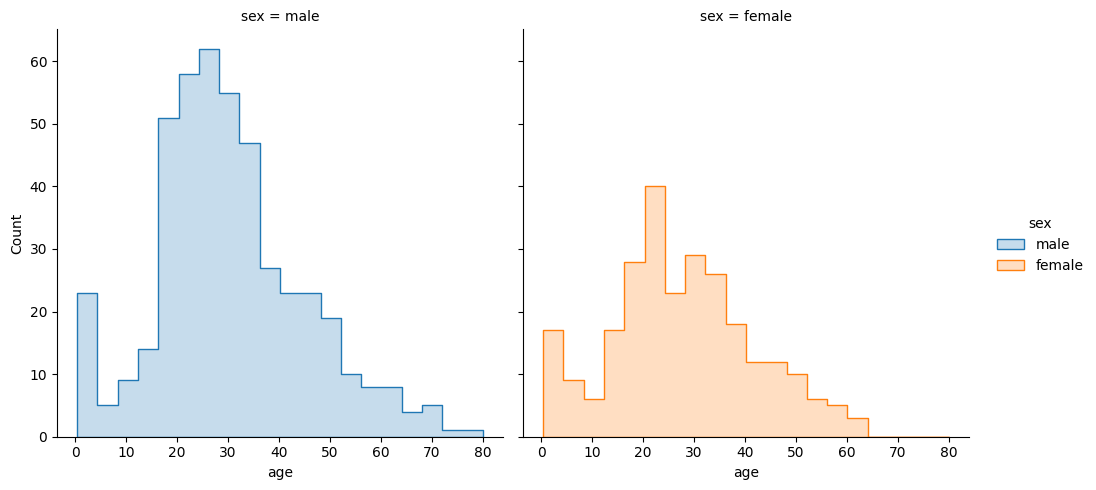

In [88]:
# facetplot
sns.displot(data=titanic,x='age',kind='hist',
           hue='sex',element='step',col='sex')

<Axes: xlabel='total_bill', ylabel='Density'>

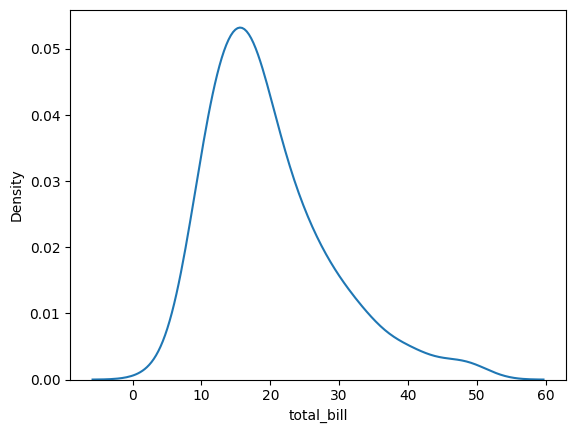

In [96]:
# kde plot -> kernel density estimation
sns.kdeplot(data=tips,x='total_bill')

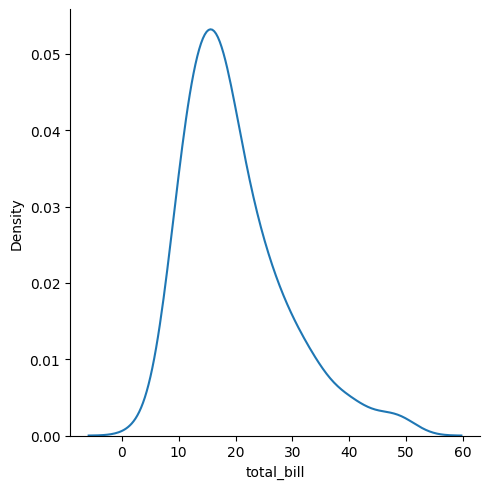

In [97]:
sns.displot(data=tips,x='total_bill',kind='kde')

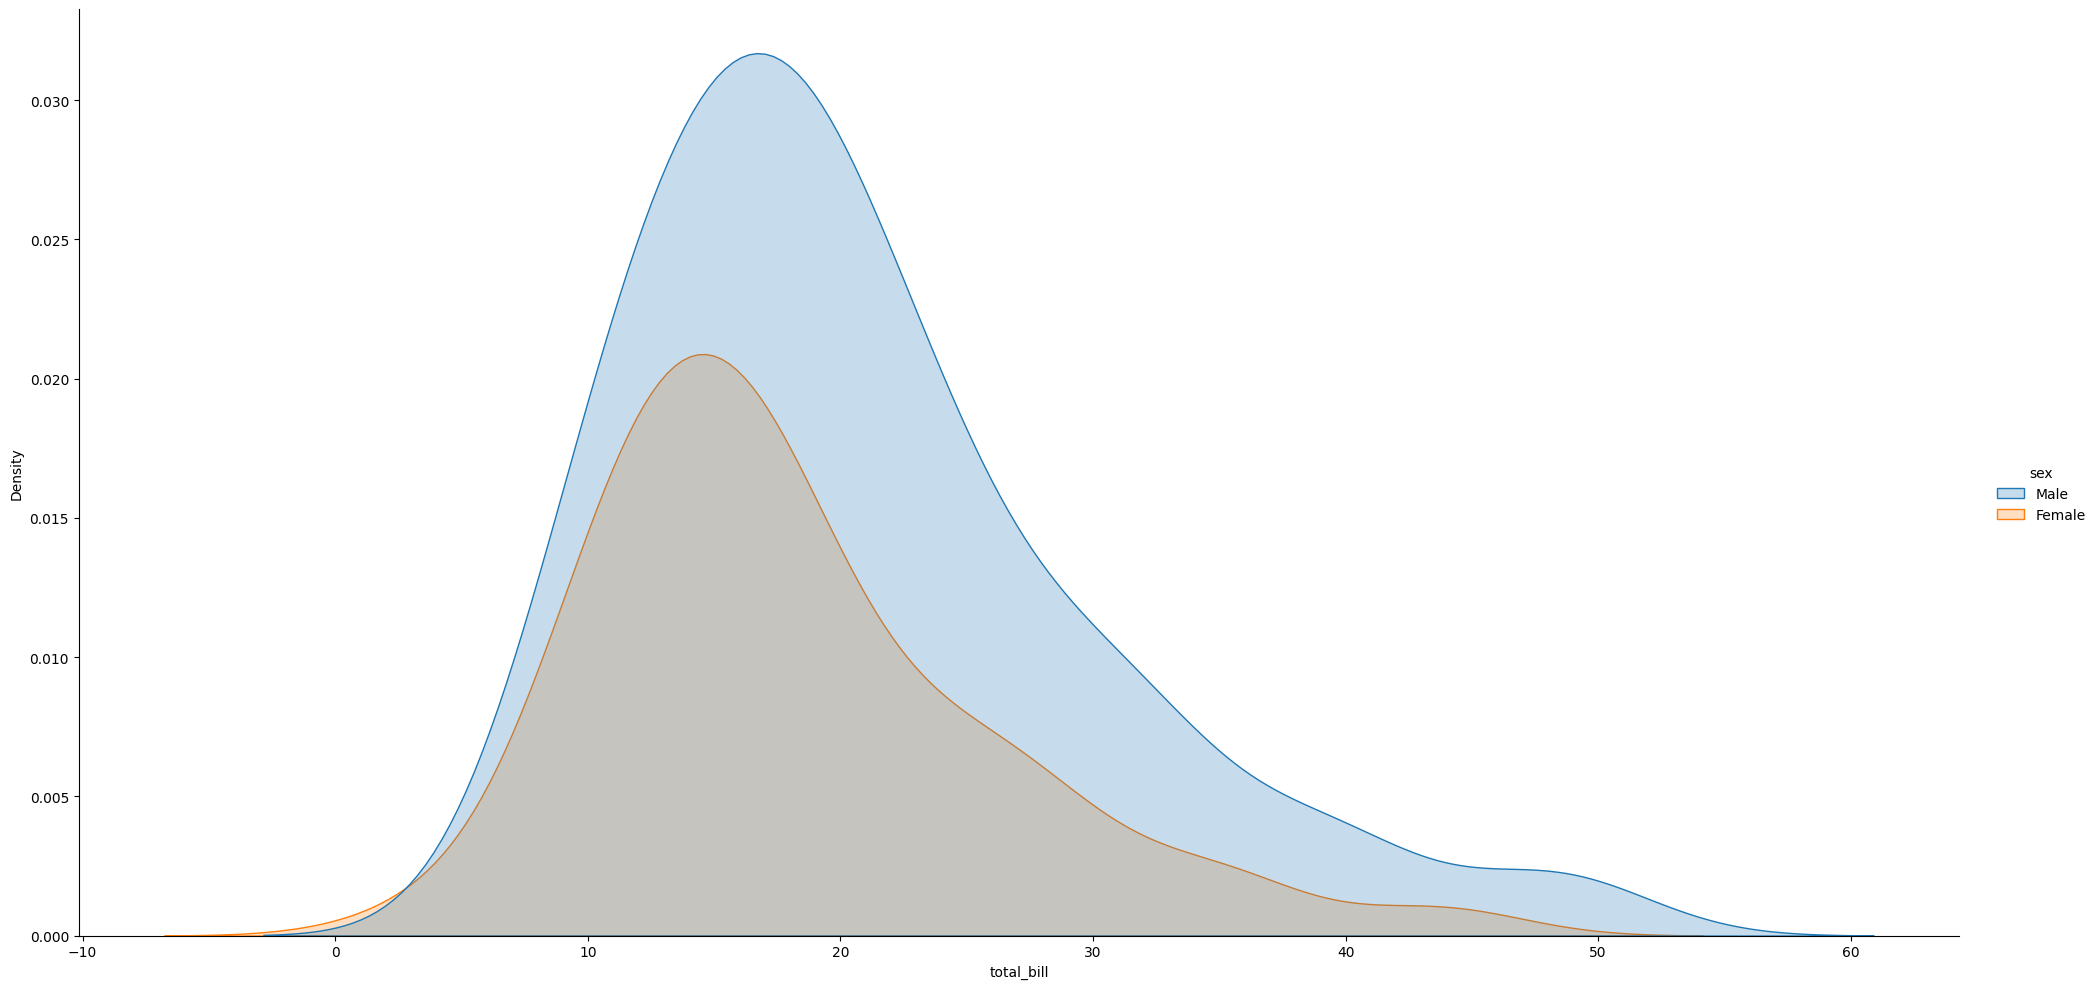

In [141]:
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True,height=10,aspect=2)

<Axes: xlabel='total_bill', ylabel='Density'>

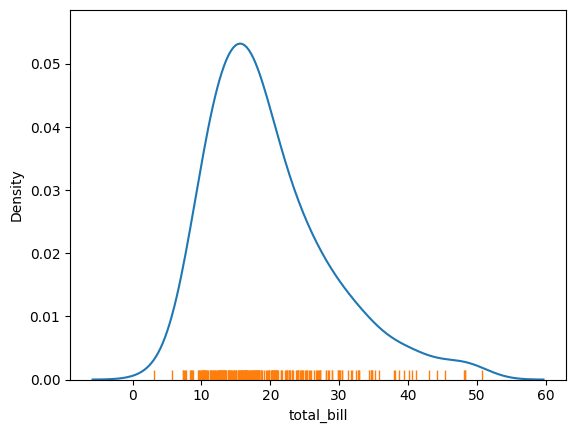

In [101]:
# rug plot
sns.kdeplot(data=tips,x='total_bill')
sns.rugplot(data=tips,x='total_bill')

<Axes: xlabel='total_bill', ylabel='Count'>

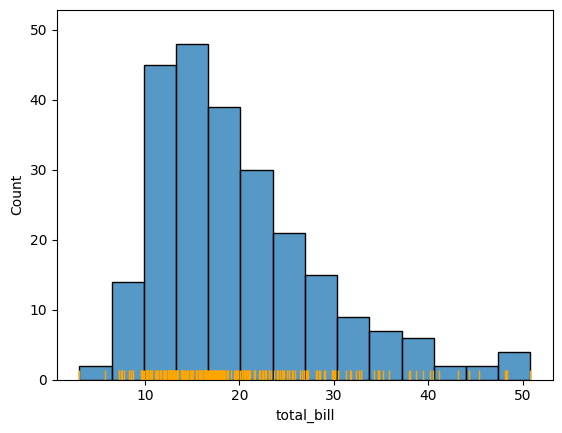

In [104]:
# rug plot
sns.histplot(data=tips,x='total_bill')
sns.rugplot(data=tips,x='total_bill',color='orange')

In [105]:
# bivariate analysis

<Axes: xlabel='total_bill', ylabel='tip'>

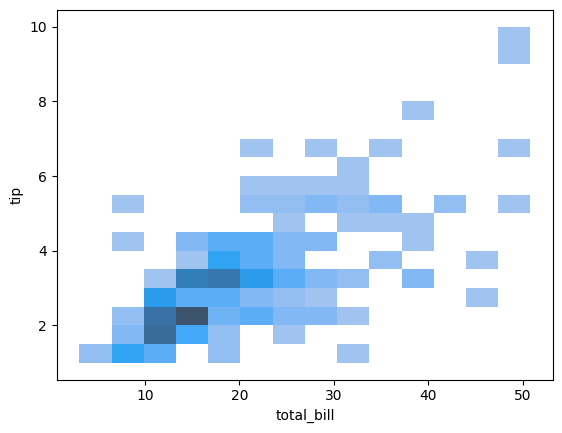

In [108]:
sns.histplot(data=tips,x='total_bill',y='tip')
# the darkest show the most number(frequency) of total bill and tips combination

<Axes: xlabel='total_bill', ylabel='tip'>

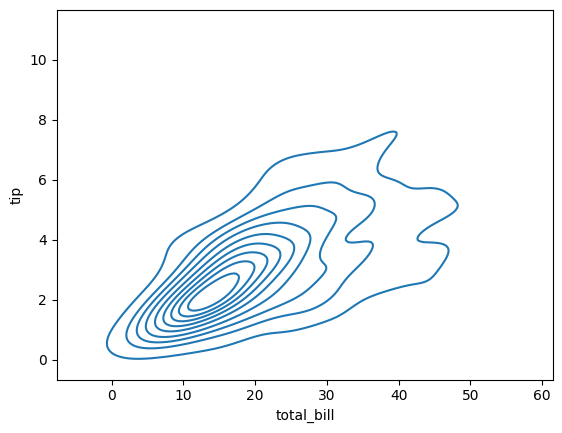

In [110]:
sns.kdeplot(data=tips,x='total_bill',y='tip')
# closest most line has more probability or density

### Matrix plot

In [122]:
# heatmap -> plot rectangular data as color encoded matrix
gap_piv=gap.pivot(index='country',columns='year',values='lifeExp')
gap_piv

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
"Yemen, Rep.",32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


<Axes: xlabel='year', ylabel='country'>

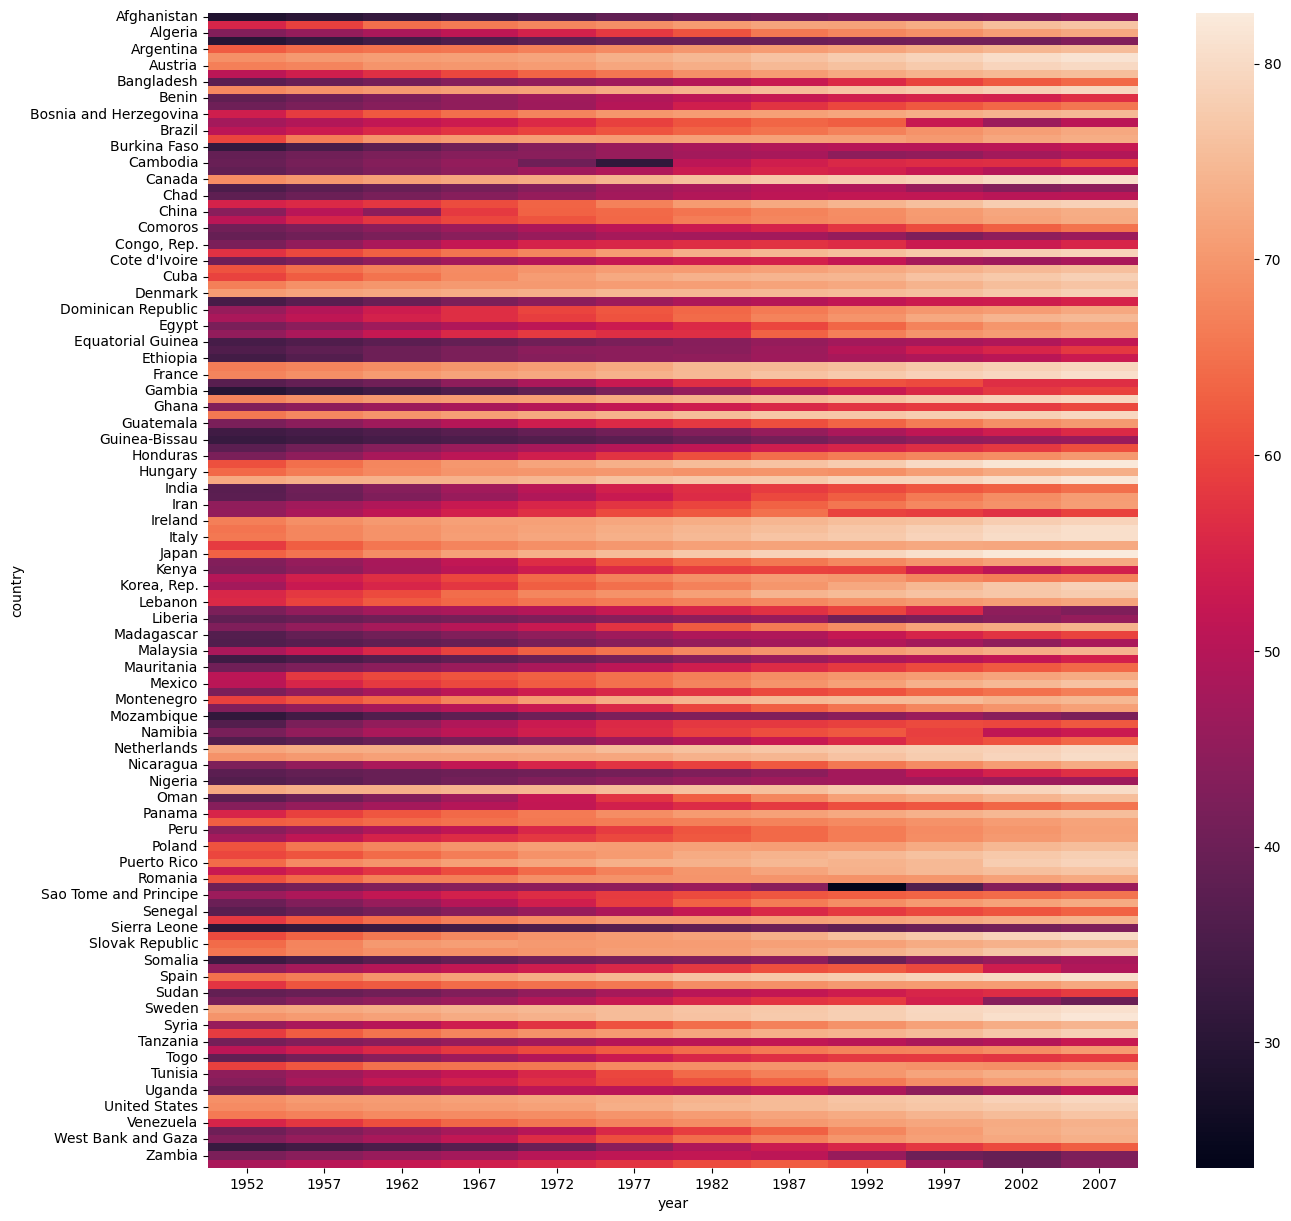

In [143]:
# axes level function and has no figure level function
plt.figure(figsize=(15,15))
sns.heatmap(gap_piv)

<Axes: xlabel='year', ylabel='country'>

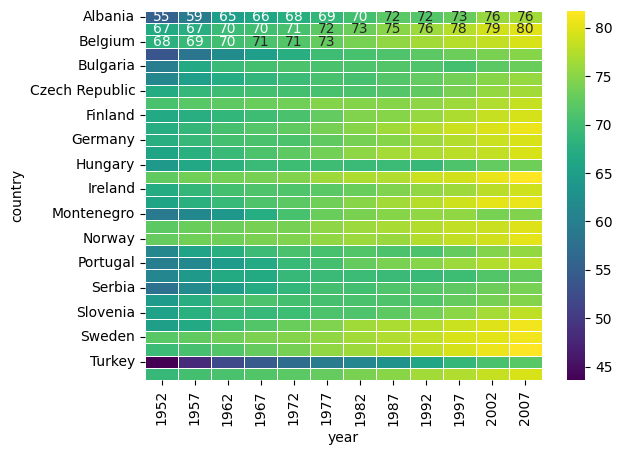

In [137]:
sns.heatmap(gap[gap['continent']=='Europe'].pivot(index='country',columns='year',values='lifeExp'),annot=True,linewidth=0.5,cmap='viridis')

In [136]:
# clustermap -> hiararchichal clustering

In [130]:
flw=px.data.iris()
flw.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
120,6.9,3.2,5.7,2.3,virginica,3
133,6.3,2.8,5.1,1.5,virginica,3
55,5.7,2.8,4.5,1.3,versicolor,2


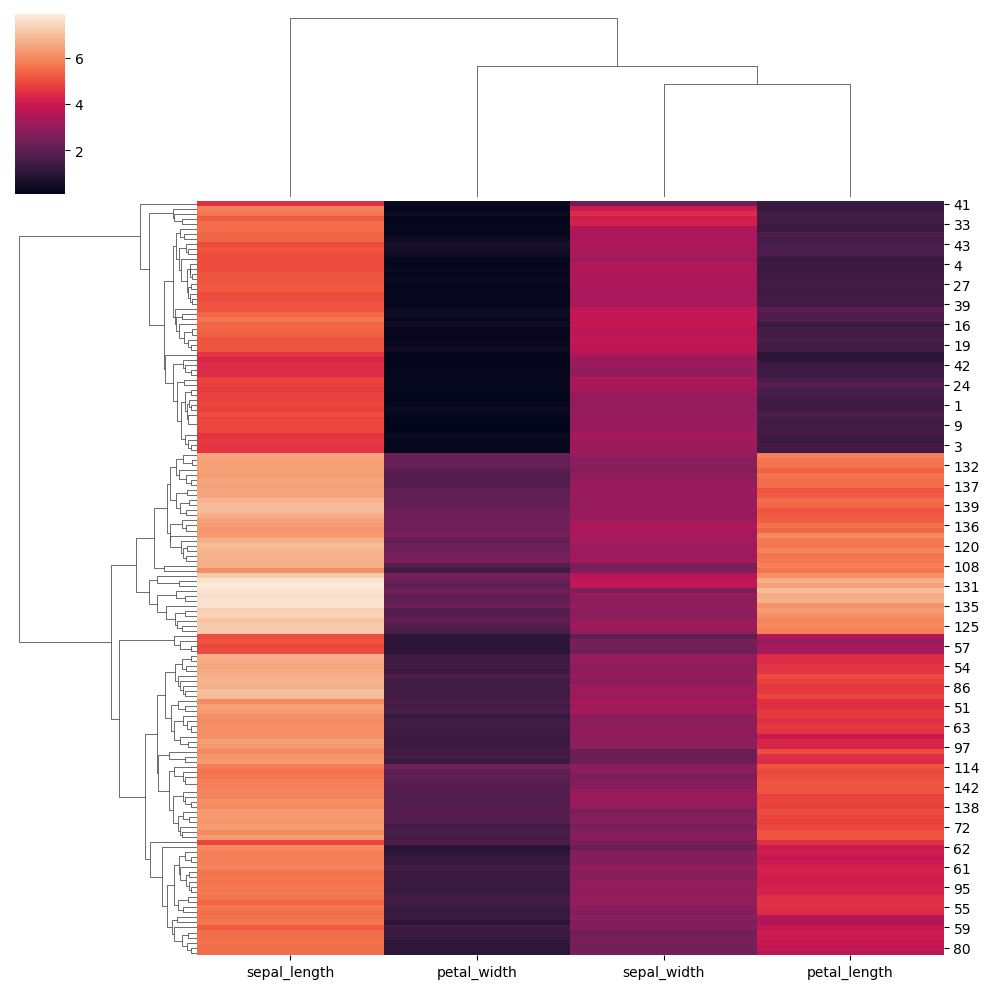

In [134]:
# which indivdual flowers are similar to each other and which of them are dissimilar
sns.clustermap(flw.iloc[:,[0,1,2,3]])